In [13]:
import pandas as pd
from mplsoccer import VerticalPitch, Pitch
from statsbombpy import sb
import matplotlib.pyplot as plt

In [ ]:
sb.competitions()
sb.matches(competition_id=43, season_id=106)

In [8]:
partido = sb.events(match_id=3869685)
partido.head()

credentials were not supplied. open data access only


,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_penalty,foul_committed_type,foul_won_advantage,foul_won_defensive,foul_won_penalty,goalkeeper_body_part,goalkeeper_end_location,goalkeeper_outcome,goalkeeper_position,goalkeeper_technique,goalkeeper_type,id,index,interception_outcome,location,match_id,...,pass_deflected,pass_end_location,pass_goal_assist,pass_height,pass_inswinging,pass_length,pass_outcome,pass_outswinging,pass_recipient,pass_shot_assist,pass_switch,pass_technique,pass_through_ball,pass_type,period,play_pattern,player,position,possession,possession_team,related_events,second,shot_aerial_won,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0584ee21-e3dd-4d9f-95a0-5b5e84be25c3,1,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,1,Argentina,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Argentina,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b32679f8-942e-4122-96a2-015caf75e628,2,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,1,Argentina,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",France,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954f6855-de22-46a2-8d09-6fe94eec2b9b,3,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,1,Argentina,[6404a8e8-afaf-489d-b65e-173a237ffed5],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6404a8e8-afaf-489d-b65e-173a237ffed5,4,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,1,Argentina,[954f6855-de22-46a2-8d09-6fe94eec2b9b],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,e84fb5b3-270f-4427-bf97-1a6eaec7285f,1752,NaN,NaN,3869685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,From Free Kick,NaN,NaN,79,France,[3e8de8c9-8be8-4921-96ec-1a29ce8fd3d4],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN


In [36]:
partido.player.value_counts()

Enzo Fernandez                     328
Rodrigo Javier De Paul             242
Lionel Andrés Messi Cuccittini     242
Nicolás Hernán Otamendi            215
Jules Koundé                       211
Aurélien Djani Tchouaméni          205
Cristian Gabriel Romero            203
Dayotchanculle Upamecano           198
Alexis Mac Allister                196
Raphaël Varane                     182
Adrien Rabiot                      176
Nicolás Alejandro Tagliafico       165
Julián Álvarez                     150
Kylian Mbappé Lottin               149
Theo Bernard François Hernández    145
Nahuel Molina Lucero               142
Ángel Fabián Di María Hernández    132
Randal Kolo Muani                  127
Marcus Thuram                      119
Marcos Javier Acuña                112
Antoine Griezmann                  103
Hugo Lloris                         97
Kingsley Coman                      85
Eduardo Camavinga                   83
Damián Emiliano Martínez            83
Gonzalo Ariel Montiel    

In [67]:
df_enzo = partido[partido['player'] == 'Lionel Andrés Messi Cuccittini']
df_enzo.shape

(242, 88)

In [71]:
df_enzo[['x', 'y']] = df_enzo.location.apply(pd.Series)
df_enzo[['end_x', 'end_y']] = df_enzo.pass_end_location.apply(pd.Series)
df_enzo[['x', 'y', 'location']]

c:\Users\Federico Rábanos\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,x,y,location
36,76.6,35.7,"[76.6, 35.7]"
39,99.3,57.3,"[99.3, 57.3]"
52,67.9,59.0,"[67.9, 59.0]"
62,81.8,65.2,"[81.8, 65.2]"
103,39.2,48.1,"[39.2, 48.1]"
...,...,...,...
4321,96.1,45.1,"[96.1, 45.1]"
4357,NaN,NaN,NaN
4363,NaN,NaN,NaN
4364,NaN,NaN,NaN


In [70]:
df_enzo.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

c:\Users\Federico Rábanos\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

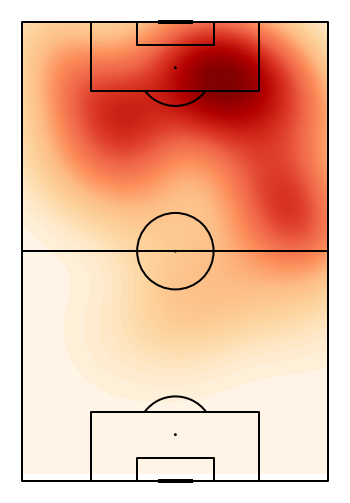

In [72]:
fig, ax = plt.subplots(figsize=(16,9))
pitch = VerticalPitch(pitch_type='statsbomb', line_color='black', pitch_color='white')

pitch.draw(ax=ax)
pitch.kdeplot(
    df_enzo[df_enzo['type'] == 'Pass']['end_x'],
    df_enzo[df_enzo['type'] == 'Pass']['end_y'],
    ax=ax,
    levels=100,
    shade=True,
    zorder=-1,
    shade_lowest=True,
    cmap='OrRd'
)